**INITIALIZATION**
- I use these three lines of code on top of my each notebooks because it will help to prevent any problems while reloading the same project. And the third line of code helps to make visualization within the notebook.

In [1]:
#@ INITIALIZATION: 
%reload_ext autoreload
%autoreload 2
%matplotlib inline

**LIBRARIES AND DEPENDENCIES**
- I have downloaded all the libraries and dependencies required for the project in one particular cell.

In [3]:
#@ INSTALLING DEPENDENCIES: UNCOMMENT BELOW: 
# !pip install -Uqq fastbook
# import fastbook
# fastbook.setup_book()

In [6]:
#@ DOWNLOADING LIBRARIES AND DEPENDENCIES: 
from fastbook import *                                  # Getting all the Libraries. 
from fastai.callback.fp16 import *
from fastai.vision.all import *                         # Getting all the Libraries.
#@ IGNORING WARNINGS: 
import warnings
warnings.filterwarnings("ignore")

**GETTING THE DATA**
- I will use **Imagenette** dataset here. 

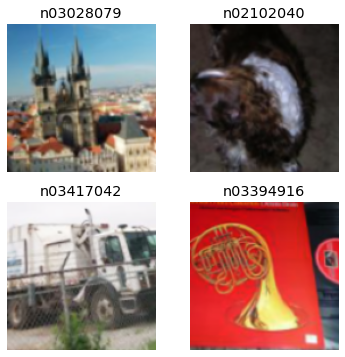

In [7]:
#@ FUNCTION FOR PREPARING THE DATASET: 
def get_data(url, presize, resize):                                         # Defining Function. 
    path = untar_data(url)                                                  # Initializing Path to Dataset. 
    return DataBlock(blocks=(ImageBlock, CategoryBlock),                    # Initilizing DataBlocks. 
                     get_items=get_image_files,                             # Getting Image Files. 
                     splitter=GrandparentSplitter(valid_name="val"),        # Splitting the Dataset. 
                     get_y=parent_label, item_tfms=Resize(resize),          # Initializing Transformations. 
                     batch_tfms=[*aug_transforms(min_scale=0.5,size=resize), 
                                 Normalize.from_stats(*imagenet_stats)]     # Normalizing the Dataset. 
                     ).dataloaders(path, bs=128)                            # Initializing DataLoaders. 

#@ INITIALIZING DATALOADERS: 
dls = get_data(URLs.IMAGENETTE_160, 160, 128)                               # Implementation of Function. 
dls.show_batch(max_n=4)                                                     # Inspecting the Data. 

In [8]:
#@ INITIALIZING RESNET34 WITHOUT PRETRAINING: BASELINE MODEL: 
def get_learner(**kwargs):                                                 # Defining Function. 
    return cnn_learner(dls, resnet34, pretrained=False,                    # Initializing ResNet Model. 
                       metrics=accuracy, **kwargs).to_fp16()               # Initializing Learner.

In [9]:
#@ TRAINING THE MODEL WITH DEFAULT OPTIMIZER: 
learn = get_learner()                                                      # Initializing Learner. 
learn.fit_one_cycle(3, 3e-3)                                               # Training the Model. 

epoch,train_loss,valid_loss,accuracy,time
0,2.536750,2.203871,0.264968,01:16
1,1.955077,1.624696,0.459363,01:16
2,1.588127,1.419850,0.536306,01:16
